<a href="https://colab.research.google.com/github/edyoda/AI-Agent-Development-and-GenAI/blob/main/Day_2_Image2Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xformers

In [1]:
import torch
print(torch.__version__)

2.6.0+cu124


In [2]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
from google.colab import files

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [6]:
uploaded = files.upload()  # A file selection dialog will appear
image_path = next(iter(uploaded))
init_image = Image.open(image_path).convert("RGB").resize((512, 512))  # Resize to 512x512 for the model

Saving istockphoto-1323013929-612x612.jpg to istockphoto-1323013929-612x612.jpg


In [7]:
model_id = "runwayml/stable-diffusion-v1-5"

# Load the pipeline and move it to CPU
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,  # You can still use float16 on CPU but might opt for float32 for stability
    safety_checker=None
).to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/25 [00:00<?, ?it/s]

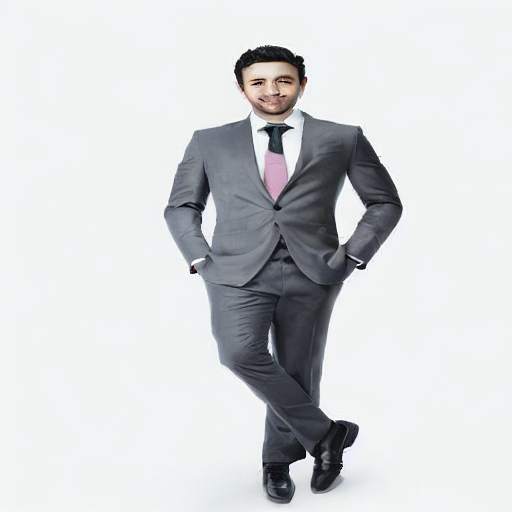

  0%|          | 0/25 [00:00<?, ?it/s]

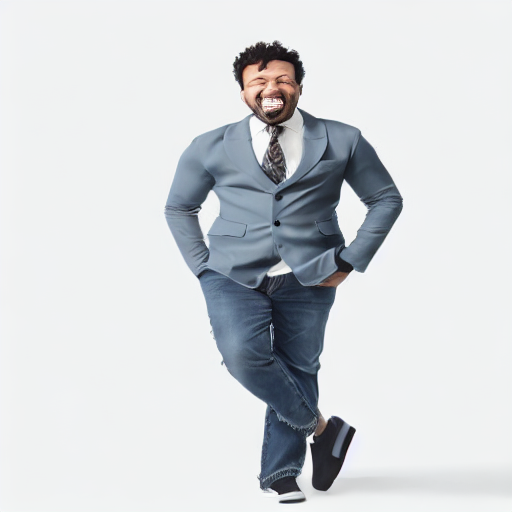

In [11]:
variation_prompts = [
    "same person wearing a pink suit, happy expression",
    "same person in casual jeans and t-shirt, laughing",
]

# Generate and save image variations on CPU
for i, prompt in enumerate(variation_prompts):
    # Adjust denoising strength: higher for significant changes (e.g., "pose" changes)
    strength = 0.55 if "pose" in prompt else 0.5

    # Generate image variation using the pipeline on CPU
    image = pipe(
        prompt=prompt + ", sharp face, high detail",
        image=init_image,
        strength=strength,
        guidance_scale=7.5,
        num_inference_steps=50,
        generator=torch.Generator(device="cpu").manual_seed(42 + i)  # Use CPU generator
    ).images[0]

    # Display and save the generated image
    display(image)
    image.save(f"variation_{i}.png")